# Cruises Portfolio Risk and Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
# Airlines Stock
symbols = ['CCL','CUK','LIND','NCLH','RCL']
start = '2019-12-01'
end = '2020-04-14'

In [3]:
df = pd.DataFrame()
for s in symbols:
    df[s] = yf.download(s,start,end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
0 years


In [5]:
number_of_years = delta.years

In [6]:
days = (df.index[-1] - df.index[0]).days
days

133

In [7]:
df.head()

,CCL,CUK,LIND,NCLH,RCL
Date,,,,,
2019-12-02,43.976734,41.633583,15.48,53.150002,117.257675
2019-12-03,43.037693,40.596443,15.04,52.860001,116.962440
2019-12-04,43.373772,40.932278,15.09,53.610001,118.192581
2019-12-05,43.690079,41.317505,15.17,54.250000,119.078293
2019-12-06,44.253506,42.028679,15.37,54.709999,120.131294


In [8]:
df.tail()

,CCL,CUK,LIND,NCLH,RCL
Date,,,,,
2020-04-06,10.21,9.34,4.22,10.01,29.610001
2020-04-07,11.30,10.45,4.97,11.01,33.549999
2020-04-08,11.99,11.15,6.14,11.72,37.560001
2020-04-09,12.42,11.54,5.38,13.11,40.220001
2020-04-13,11.50,10.69,5.13,11.36,33.369999


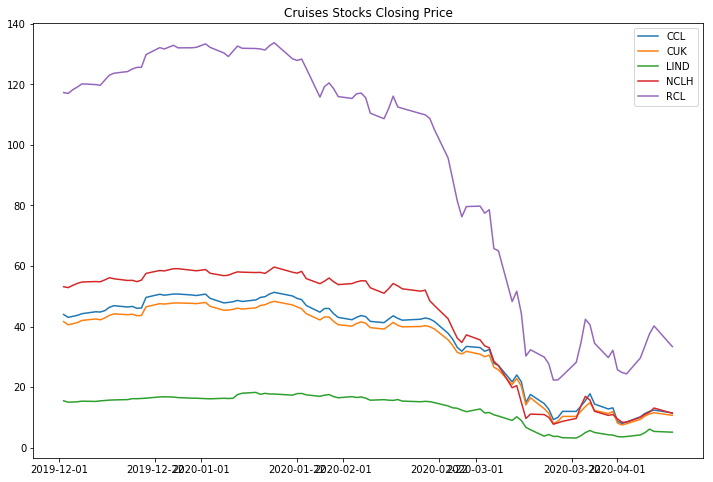

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Cruises Stocks Closing Price')
plt.legend(labels=df.columns)

In [10]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

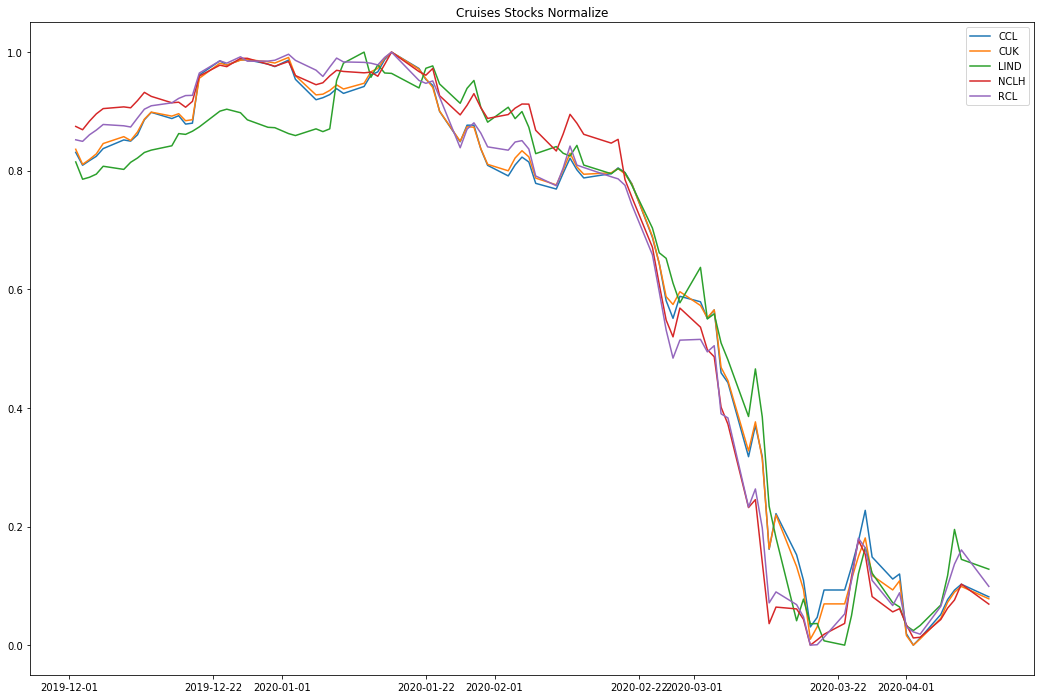

In [11]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Cruises Stocks Normalize')
plt.legend(labels=normalize.columns)

In [12]:
stock_rets = df.pct_change().dropna()

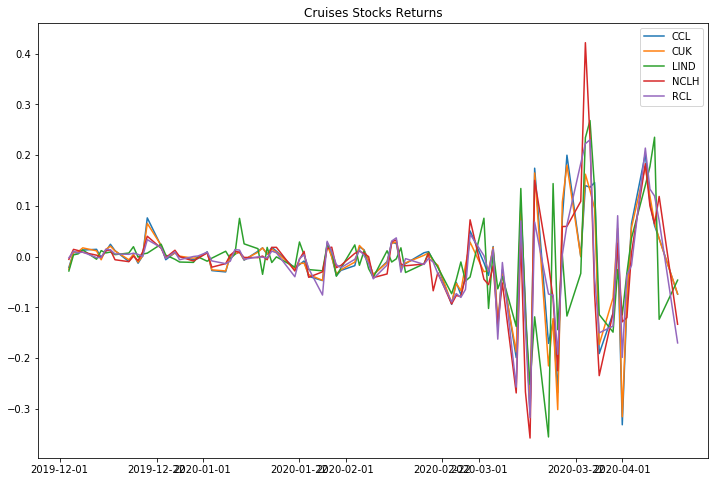

In [13]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets)
plt.title('Cruises Stocks Returns')
plt.legend(labels=stock_rets.columns)

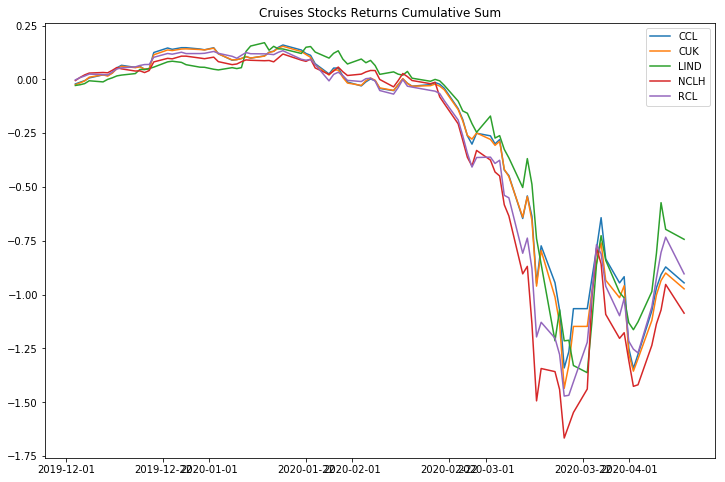

In [14]:
plt.figure(figsize=(12,8))
plt.plot(stock_rets.cumsum())
plt.title('Cruises Stocks Returns Cumulative Sum')
plt.legend(labels=stock_rets.columns)

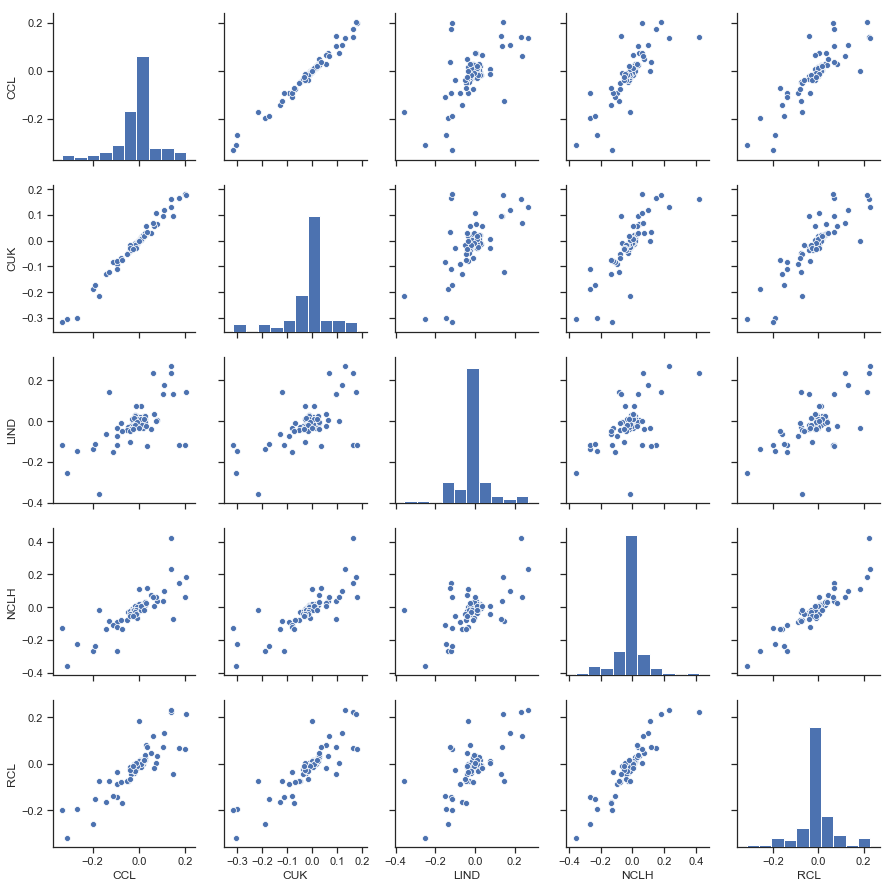

In [15]:
sns.set(style='ticks')
ax = sns.pairplot(stock_rets, diag_kind='hist')

nplot = len(stock_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

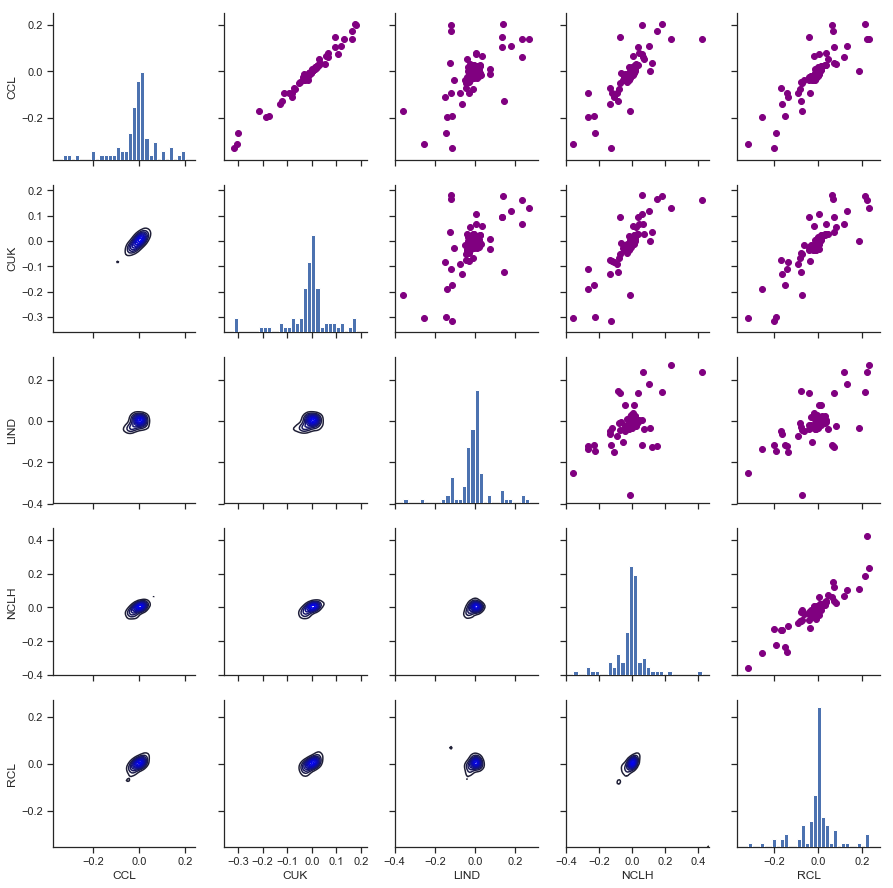

In [16]:
ax = sns.PairGrid(stock_rets)
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='blue')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

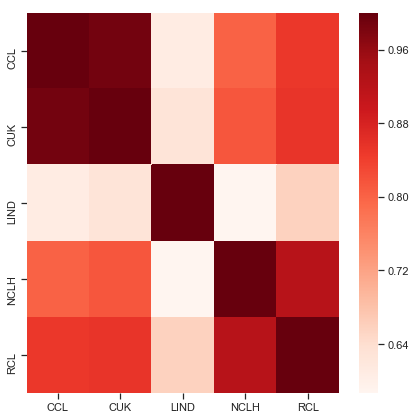

In [17]:
plt.figure(figsize=(7,7))
corr = stock_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Reds")

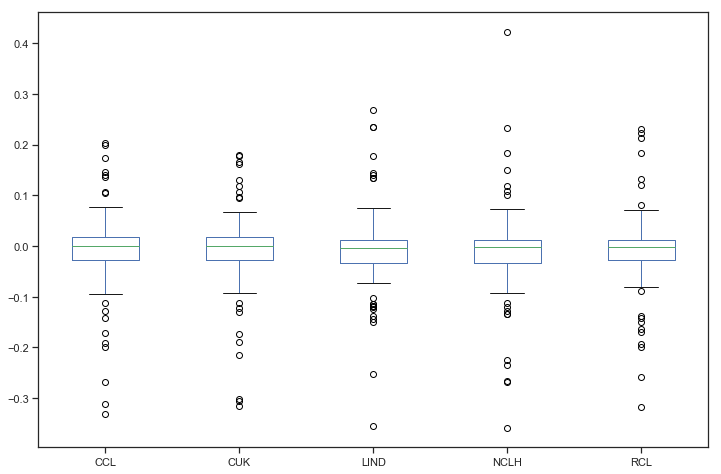

In [18]:
# Box plot
stock_rets.plot(kind='box',figsize=(12,8))

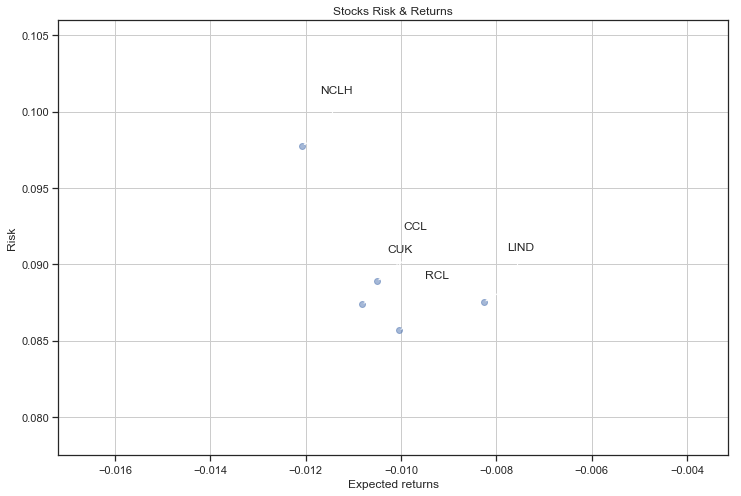

In [19]:
rets = stock_rets.dropna()

plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5)

plt.title('Stocks Risk & Returns')
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.grid(which='major')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

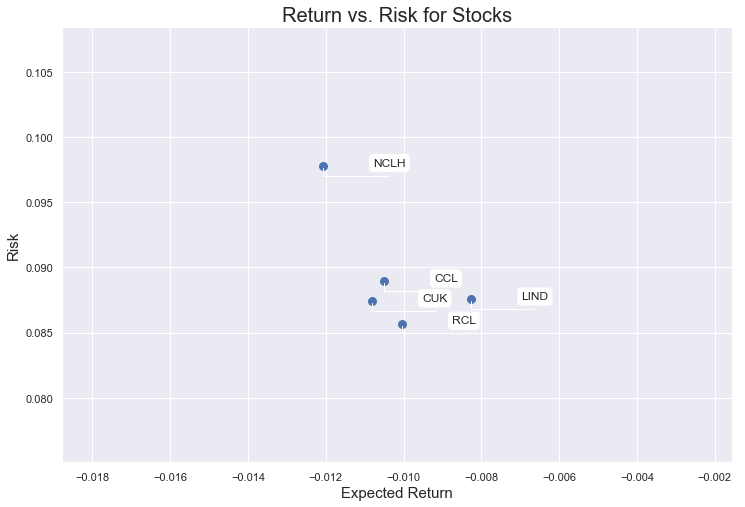

In [20]:
rets = stock_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [21]:
rest_rets = rets.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

RCL   RCL     1.000000
NCLH  NCLH    1.000000
CUK   CUK     1.000000
LIND  LIND    1.000000
CCL   CCL     1.000000
      CUK     0.990227
CUK   CCL     0.990227
RCL   NCLH    0.923020
NCLH  RCL     0.923020
RCL   CUK     0.854708
CUK   RCL     0.854708
CCL   RCL     0.850806
RCL   CCL     0.850806
CUK   NCLH    0.814799
NCLH  CUK     0.814799
      CCL     0.802360
CCL   NCLH    0.802360
LIND  RCL     0.658584
RCL   LIND    0.658584
LIND  CUK     0.630125
CUK   LIND    0.630125
CCL   LIND    0.610575
LIND  CCL     0.610575
      NCLH    0.586554
NCLH  LIND    0.586554
dtype: float64

In [22]:
# Normalized Returns Data
Normalized_Value = ((rets[:] - rets[:].min()) /(rets[:].max() - rets[:].min()))
Normalized_Value.head()

,CCL,CUK,LIND,NCLH,RCL
Date,,,,,
2019-12-03,0.580947,0.586449,0.524525,0.451989,0.575166
2019-12-04,0.635516,0.653301,0.575390,0.477178,0.598948
2019-12-05,0.634550,0.655595,0.578557,0.474293,0.593431
2019-12-06,0.645035,0.671312,0.591186,0.469858,0.595893
2019-12-09,0.647654,0.659362,0.561725,0.462501,0.576023


In [23]:
Normalized_Value.corr()

,CCL,CUK,LIND,NCLH,RCL
CCL,1.000000,0.990227,0.610575,0.802360,0.850806
CUK,0.990227,1.000000,0.630125,0.814799,0.854708
LIND,0.610575,0.630125,1.000000,0.586554,0.658584
NCLH,0.802360,0.814799,0.586554,1.000000,0.923020
RCL,0.850806,0.854708,0.658584,0.923020,1.000000


In [24]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

RCL   RCL     1.000000
NCLH  NCLH    1.000000
CUK   CUK     1.000000
LIND  LIND    1.000000
CCL   CCL     1.000000
      CUK     0.990227
CUK   CCL     0.990227
RCL   NCLH    0.923020
NCLH  RCL     0.923020
RCL   CUK     0.854708
CUK   RCL     0.854708
CCL   RCL     0.850806
RCL   CCL     0.850806
CUK   NCLH    0.814799
NCLH  CUK     0.814799
      CCL     0.802360
CCL   NCLH    0.802360
LIND  RCL     0.658584
RCL   LIND    0.658584
LIND  CUK     0.630125
CUK   LIND    0.630125
CCL   LIND    0.610575
LIND  CCL     0.610575
      NCLH    0.586554
NCLH  LIND    0.586554
dtype: float64

In [25]:
print("Stock returns: ")
print(rets.mean())
print('-' * 50)
print("Stock risks:")
print(rets.std())

Stock returns: 
CCL    -0.010504
CUK    -0.010812
LIND   -0.008256
NCLH   -0.012068
RCL    -0.010038
dtype: float64
--------------------------------------------------
Stock risks:
CCL     0.088926
CUK     0.087401
LIND    0.087545
NCLH    0.097778
RCL     0.085690
dtype: float64


In [26]:
table = pd.DataFrame()
table['Returns'] = rets.mean()
table['Risk'] = rets.std()
table.sort_values(by='Returns')

,Returns,Risk
NCLH,-0.012068,0.097778
CUK,-0.010812,0.087401
CCL,-0.010504,0.088926
RCL,-0.010038,0.085690
LIND,-0.008256,0.087545


In [27]:
table.sort_values(by='Risk')

,Returns,Risk
RCL,-0.010038,0.085690
CUK,-0.010812,0.087401
LIND,-0.008256,0.087545
CCL,-0.010504,0.088926
NCLH,-0.012068,0.097778


In [28]:
rf = 0.01
table['Sharpe Ratio'] = (table['Returns'] - rf) / table['Risk']
table

,Returns,Risk,Sharpe Ratio
CCL,-0.010504,0.088926,-0.230573
CUK,-0.010812,0.087401,-0.238126
LIND,-0.008256,0.087545,-0.208537
NCLH,-0.012068,0.097778,-0.225693
RCL,-0.010038,0.085690,-0.233842


In [29]:
table['Max Returns'] = rets.max()

In [30]:
table['Min Returns'] = rets.min()

In [31]:
table['Median Returns'] = rets.median()

In [32]:
total_return = stock_rets[-1:].transpose()
table['Total Return'] = 100 * total_return
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return
CCL,-0.010504,0.088926,-0.230573,0.202591,-0.331815,0.000000,-7.407408
CUK,-0.010812,0.087401,-0.238126,0.180365,-0.316010,-0.000343,-7.365688
LIND,-0.008256,0.087545,-0.208537,0.268354,-0.355818,-0.004374,-4.646840
NCLH,-0.012068,0.097778,-0.225693,0.421923,-0.357951,-0.001896,-13.348589
RCL,-0.010038,0.085690,-0.233842,0.230345,-0.317782,-0.001968,-17.031333


In [33]:
table['Average Return Days'] = (1 + total_return)**(1 / days) - 1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days
CCL,-0.010504,0.088926,-0.230573,0.202591,-0.331815,0.000000,-7.407408,-0.000578
CUK,-0.010812,0.087401,-0.238126,0.180365,-0.316010,-0.000343,-7.365688,-0.000575
LIND,-0.008256,0.087545,-0.208537,0.268354,-0.355818,-0.004374,-4.646840,-0.000358
NCLH,-0.012068,0.097778,-0.225693,0.421923,-0.357951,-0.001896,-13.348589,-0.001077
RCL,-0.010038,0.085690,-0.233842,0.230345,-0.317782,-0.001968,-17.031333,-0.001403


In [34]:
initial_value = df.iloc[0]
ending_value = df.iloc[-1]
table['CAGR'] = ((ending_value / initial_value) ** (252.0 / days)) -1
table

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
CCL,-0.010504,0.088926,-0.230573,0.202591,-0.331815,0.000000,-7.407408,-0.000578,-0.921247
CUK,-0.010812,0.087401,-0.238126,0.180365,-0.316010,-0.000343,-7.365688,-0.000575,-0.923928
LIND,-0.008256,0.087545,-0.208537,0.268354,-0.355818,-0.004374,-4.646840,-0.000358,-0.876638
NCLH,-0.012068,0.097778,-0.225693,0.421923,-0.357951,-0.001896,-13.348589,-0.001077,-0.946261
RCL,-0.010038,0.085690,-0.233842,0.230345,-0.317782,-0.001968,-17.031333,-0.001403,-0.907556


In [35]:
table.sort_values(by='Average Return Days')

,Returns,Risk,Sharpe Ratio,Max Returns,Min Returns,Median Returns,Total Return,Average Return Days,CAGR
RCL,-0.010038,0.085690,-0.233842,0.230345,-0.317782,-0.001968,-17.031333,-0.001403,-0.907556
NCLH,-0.012068,0.097778,-0.225693,0.421923,-0.357951,-0.001896,-13.348589,-0.001077,-0.946261
CCL,-0.010504,0.088926,-0.230573,0.202591,-0.331815,0.000000,-7.407408,-0.000578,-0.921247
CUK,-0.010812,0.087401,-0.238126,0.180365,-0.316010,-0.000343,-7.365688,-0.000575,-0.923928
LIND,-0.008256,0.087545,-0.208537,0.268354,-0.355818,-0.004374,-4.646840,-0.000358,-0.876638
